<a href="https://colab.research.google.com/github/Layaa-V/M25CSA017-NLU-A1-prob4/blob/main/M25CSA017_prob4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

## Data -

In [108]:
def load_actual_data():
    # Define the specific categories we want (Sports vs Politics)
    categories = ['rec.sport.baseball', 'rec.sport.hockey','talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc']

    # get data (and then making a dataframe out of it)
    dataset = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'), shuffle=True, random_state=10)
    df = pd.DataFrame({'text': dataset.data, 'target': dataset.target})

    # map the numeric targets back to 'Sports' or 'Politics'
    def map_label(target_idx):
        label_name = dataset.target_names[target_idx]
        if 'sport' in label_name:
            return 'Sports'
        elif 'politics' in label_name:
            return 'Politics'
        else:
            return 'Other'

    df['label'] = df['target'].apply(map_label)

    # Drop empty rows (some posts might be empty after removing headers)
    df = df[df['text'].str.strip().astype(bool)]
    return df

In [109]:
def predict_document(filepath, model, vectorizer):
    with open(filepath, 'r', encoding='utf-8') as f:
        content = f.read()

    # Check if file is empty
    if not content.strip():
        return "Error: File is empty."

    # Vectorize the file content
    vec_input = vectorizer.transform([content])

    # Predict
    prediction = model.predict(vec_input)[0]
    return prediction

In [110]:
df = load_actual_data()

In [111]:
df.head()

,text,target,label
0,\n\n In the season 92/93 playing ...,1,Sports
1,\nYou obviously don't understand how TV schedu...,1,Sports
2,"\n\tClose Roger, but no banana, er avocado or ...",1,Sports
3,Have Belfour and Roenick done another disappea...,1,Sports
4,Ten Questions about arab countries\n----------...,3,Politics


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4494 entries, 0 to 4617
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4494 non-null   object
 1   target  4494 non-null   int64 
 2   label   4494 non-null   object
dtypes: int64(1), object(2)
memory usage: 140.4+ KB


In [113]:
df['label'].value_counts()

,count
label,
Politics,2561
Sports,1933


# Training -

In [114]:
# converting text to numbers
# max_features=5000 helps us by keeping only top 5k words to save memory/speed
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

In [115]:
X = tfidf.fit_transform(df['text'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
models = { "Naive Bayes": MultinomialNB(), "Logistic Regression": LogisticRegression(max_iter=1000), "SVM (Linear)": SVC(kernel='linear')}

In [116]:
best_model_name = ""
best_acc = 0
trained_models = {}
accuracies = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    trained_models[name] = model
    accuracies.append(acc)
    print(f"{name}: {acc:.4f}")
    if acc == max(accuracies):
        best_acc = acc
        best_model_name = name

print(f"\nBest Model: {best_model_name} with {best_acc:.2%} accuracy.")

Naive Bayes: 0.9544
Logistic Regression: 0.9444
SVM (Linear): 0.9433

Best Model: Naive Bayes with 95.44% accuracy.


# Comparing Accuracies -

In [117]:
df_acc = pd.DataFrame({'Model': list(models.keys()),'Accuracy': accuracies})

In [118]:
df_acc

,Model,Accuracy
0,Naive Bayes,0.954394
1,Logistic Regression,0.944383
2,SVM (Linear),0.943270


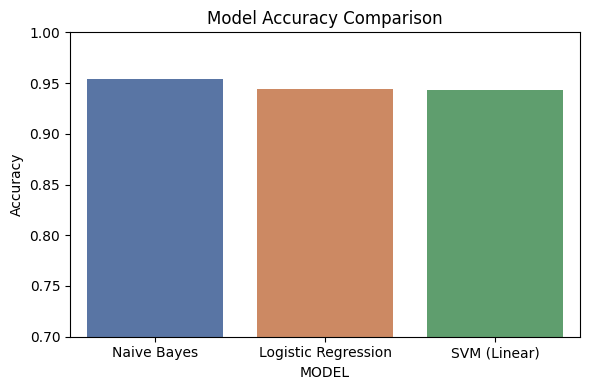

In [119]:
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='Accuracy', data=df_acc, palette='deep')
plt.title('Model Accuracy Comparison')
plt.xlabel('MODEL')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0) # Set y-axis limits for better
plt.xticks()
plt.tight_layout()
plt.show()

## Testing on new, unseen document (text file) -

In [120]:
inp = input("Enter a filename: ").strip()
result = predict_document(inp, trained_models[best_model_name], tfidf)
print(f"Prediction: ", result)

Enter a filename: pol.txt
Prediction:  Politics
